## Домашнее задание 3 (10 баллов)

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [1]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv")
df = pd.concat([data.head(5), data.tail(5)])
df

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
999,no checking account,30,no credits taken/all credits paid back duly,car (used),6350,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,car or other,31,none,rent,1,skilled employee/official,0 to 2,no,no,bad


### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [3]:
data.isna().mean()

status                     0.0
duration                   0.0
credit_history             0.0
purpose                    0.0
amount                     0.0
savings                    0.0
employment_duration        0.0
installment_rate           0.0
personal_status_sex        0.0
other_debtors              0.0
present_residence          0.0
property                   0.0
age                        0.0
other_installment_plans    0.0
housing                    0.0
number_credits             0.0
job                        0.0
people_liable              0.0
telephone                  0.0
foreign_worker             0.0
credit_risk                0.0
dtype: float64

#### Признаки:
##### Бинарные:
telephone, foreign_worker, credit_risk, people_liable (объяснение для people_liable: т.к. всего лишь два значения: "0-2" и "3+")
##### Количественные:
duration, amount, age, number_credits (объяснение для number_credits: т.к. речь все же идет о количестве, то есть можно извлечь саму величину или  минимальную величину из данного диапазона)
##### Категориальные:
credit_history, purpose, personal_status_sex, other_debtors, property, other_installment_plans, housing, job
##### Порядковые:
status, savings, employment_duration, installment_rate, president_residence (объяснение для всех признаков: так для всех этих признаков можно сравнить их значения между собой)

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [4]:
data.groupby(by="purpose")["amount"].mean()

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [5]:
young = data[(data["age"] < 30)&(data["housing"] == "rent")]
percent = round(100 * len(young) / len(data[data["age"] < 30]))
print(f"{percent}% клиентов моложе 30 лет снимает жилье")

67% клиентов моложе 30 лет снимает жилье


In [6]:
olders = data[(data["age"] > 40)&(data["housing"] == "rent")]
percent = round(100 * len(olders) / len(data[data["age"] > 40]))
print(f"{percent}% клиентов старше 40 лет снимает жилье")

68% клиентов старше 40 лет снимает жилье


### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [7]:
data["number_credits"].value_counts()

1       633
2-3     333
4-5      28
>= 6      6
Name: number_credits, dtype: int64

Так как количество кредитов закодировано строками, причем с разными видами, то нам придется привести данный столбец к единому виду. Создадим новую колонку `min_number_credits`, в которую определим минимальный порог для каждого интервала столбца `number_credits`

In [8]:
def separate(s):
    if "-" in s:
        return int(s.split("-")[0])
    else:
        return int(s[-1])

data["min_number_credits"] =  data["number_credits"].apply(separate)

In [9]:
data[(data["foreign_worker"] == "yes") & (data["min_number_credits"] > 3)]

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk,min_number_credits
213,0<= ... < 200 DM,6,all credits at this bank paid back duly,others,1299,unknown/no savings account,1 <= ... < 4 yrs,>= 35,male : married/widowed,none,...,74,none,rent,4-5,unemployed/unskilled - non-resident,3 or more,no,yes,good,4


Следовательно получаем, что только у 1 иностранца число кредитов больше 3.

### Задание 6 (1 балл)

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

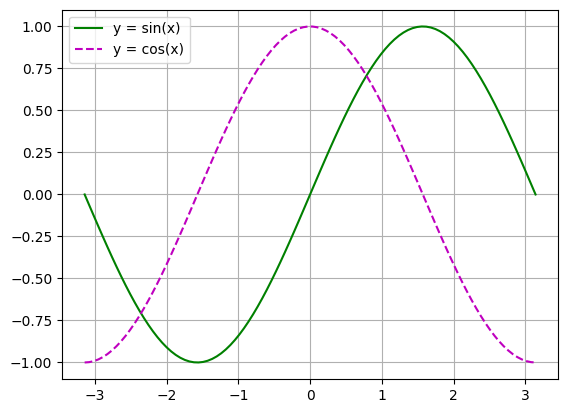

In [11]:
x = np.linspace(-np.pi, np.pi, 100)
y = np.sin(x)
f = np.cos(x)
plt.plot(x, y,"g", x, f, "--m")
plt.grid()
plt.legend(['y = sin(x)', 'y = cos(x)'])
plt.show()

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

Создадим отдельные датафреймы (`good`,`bad`, `row_risk`), в которых посчитаем количество положительных/отрицательных/всех кейсов для каждой категории атрибута `status`

In [12]:
good = data[data["credit_risk"] == "good"].groupby(by="status")['credit_risk'].agg('count')
bad = data[data["credit_risk"] == "bad"].groupby(by="status")['credit_risk'].agg('count')
row_risk = data.groupby(by="status")['credit_risk'].agg('count')

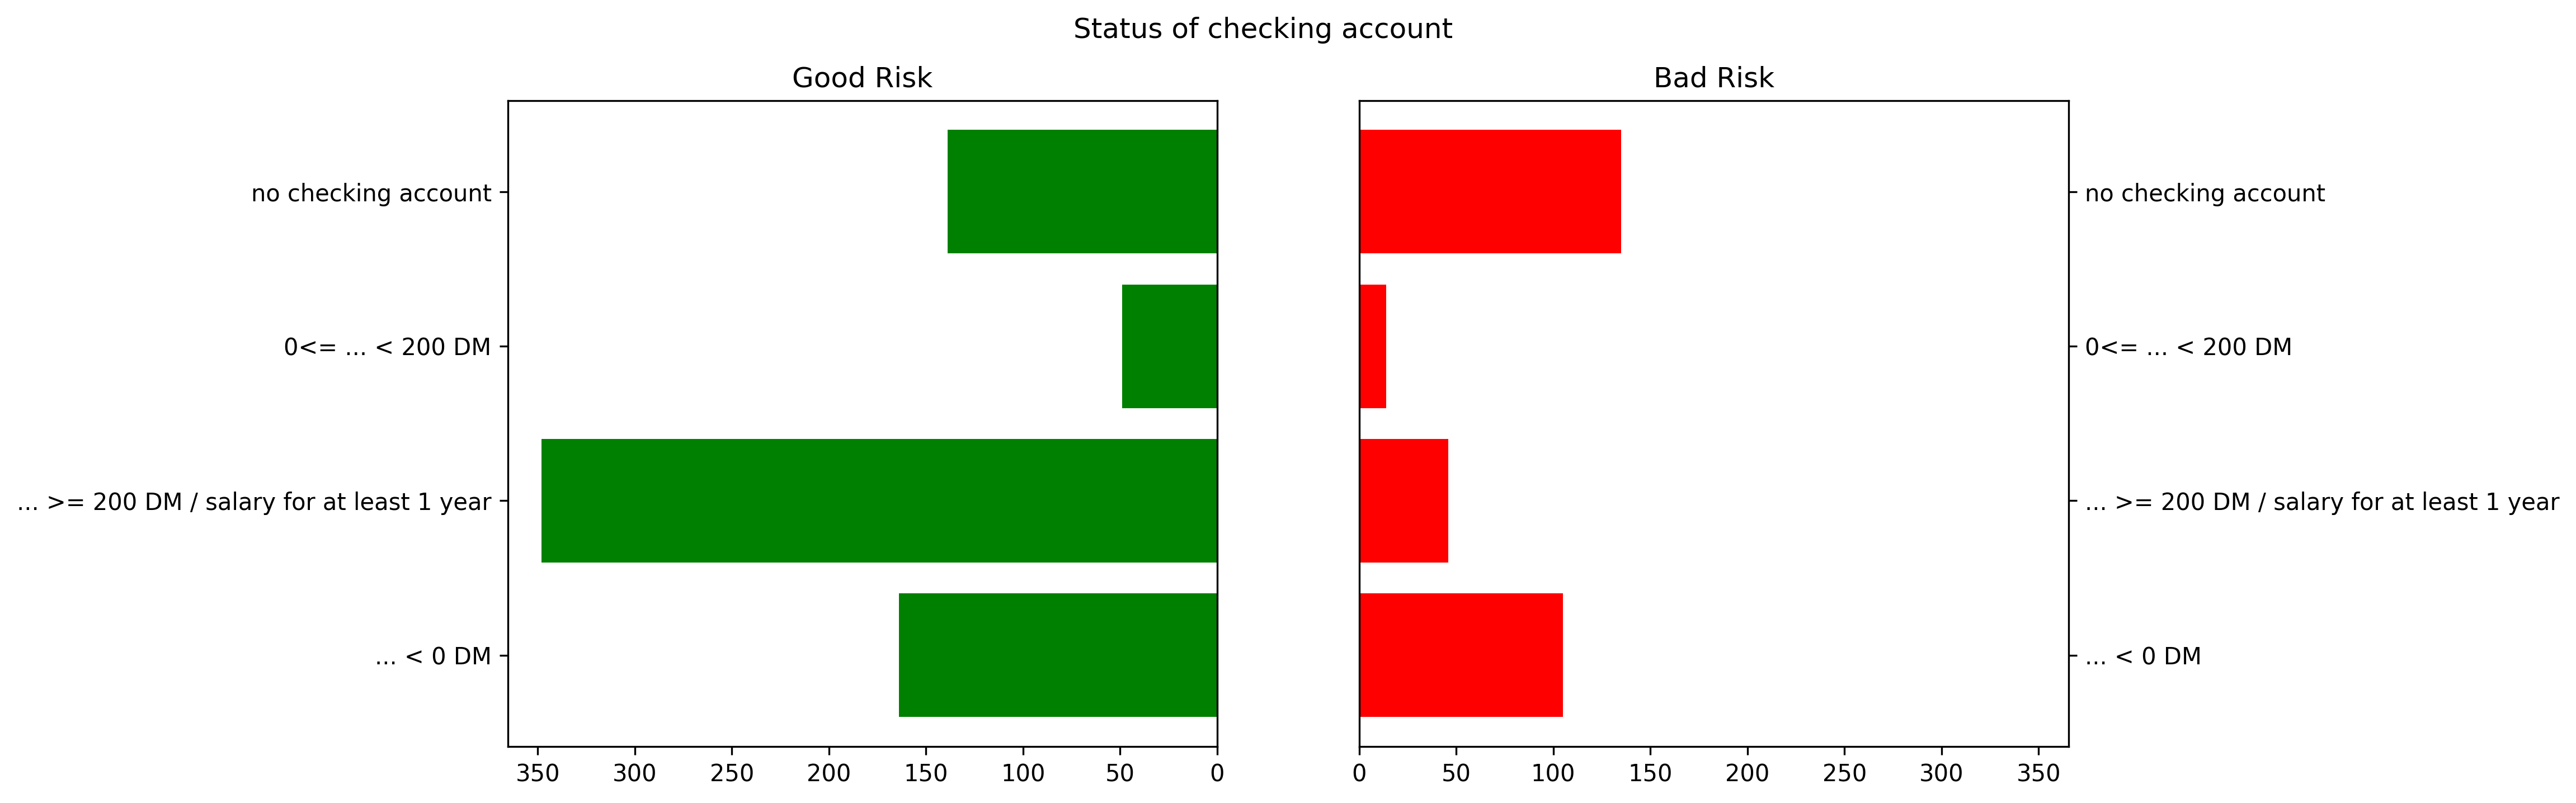

In [13]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), dpi=300)
f.suptitle("Status of checking account")
ax1.barh(good.index, good, color='g')
ax1.set_title('Good Risk')
ax1.invert_xaxis()
lims = np.flip(ax1.get_xlim())
ax2.barh(bad.index, bad, color='r')
ax2.set_title('Bad Risk')
ax2.yaxis.tick_right()
ax2.set_xlim(lims)
plt.show()

### Задание 8  (0.5 балла)

In [14]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

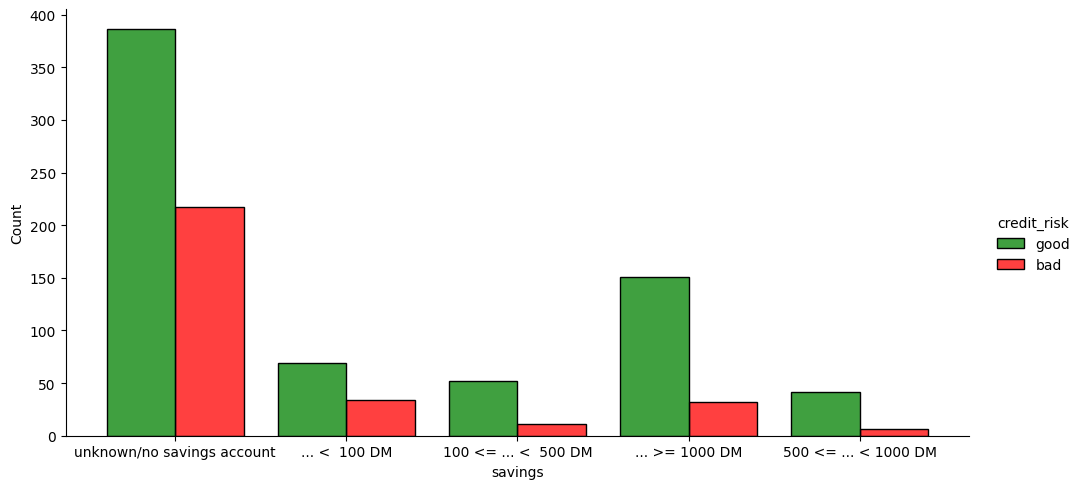

In [15]:
sns.displot(data, x="savings", hue="credit_risk", multiple="dodge", aspect=2, shrink=0.8, palette=['green', 'red']);

Способ построение с помощью seaborn больше понравился, так как с ним не надо мучиться 3 часа и искать миллион документаций и примеров как на официальных сайтах, так и на StackOverFlow. И с точки зрения кода, и с точки зрения визуализации данный вид графика лучше.

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

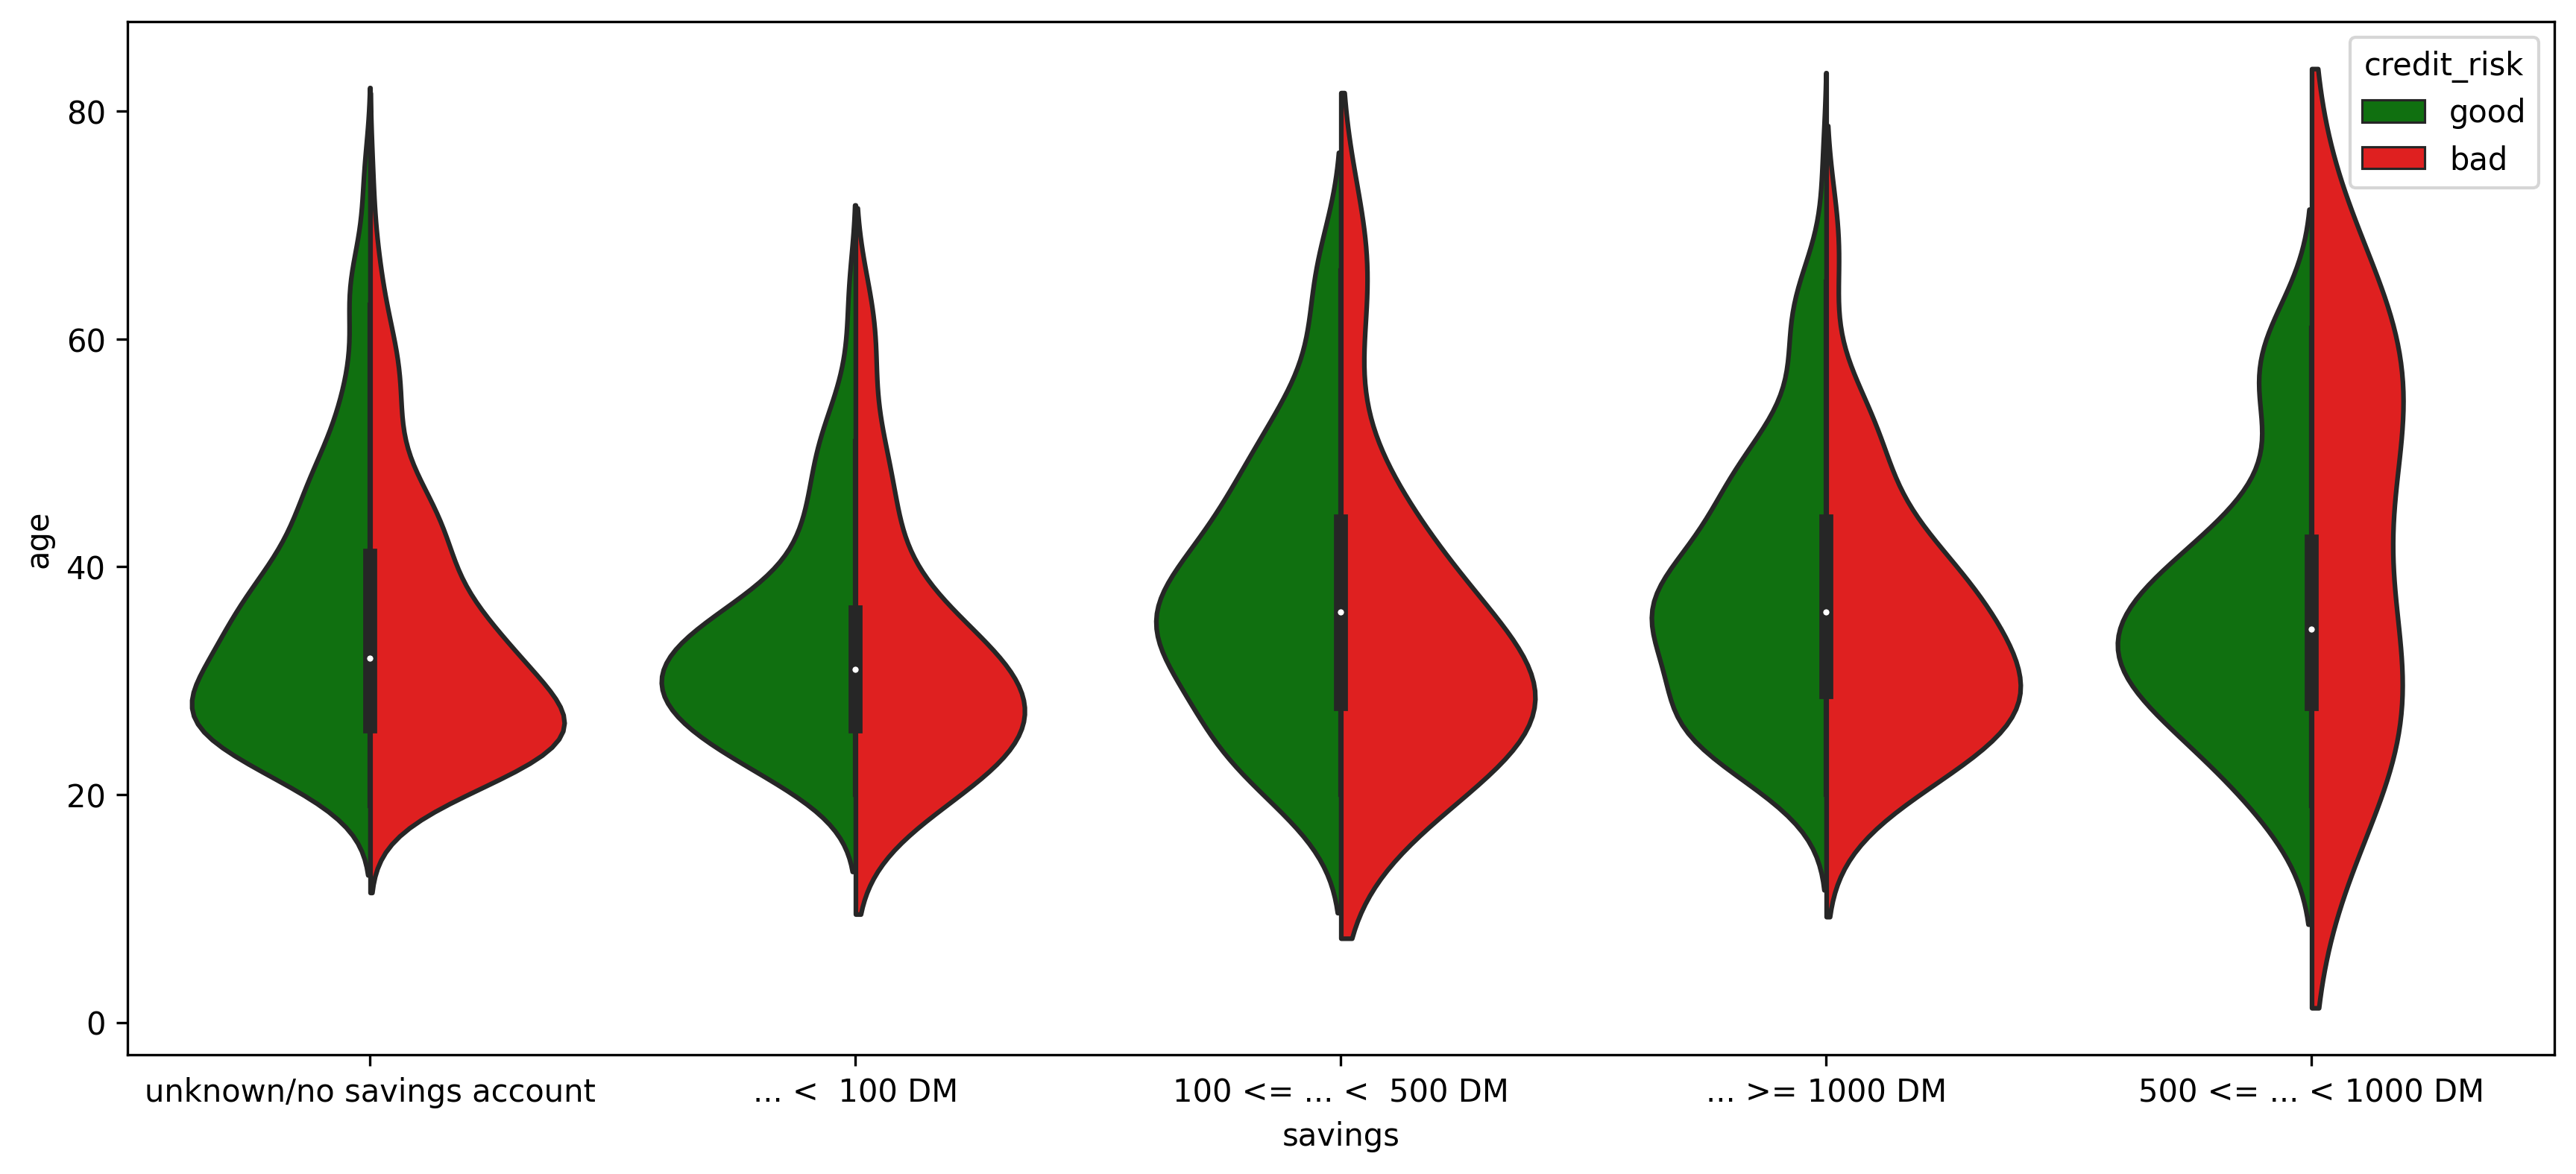

In [16]:
plt.figure(figsize=(14, 6), dpi=300)
sns.violinplot(data, x="savings", y="age", hue="credit_risk", split=True, palette=['green', 'red']);

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

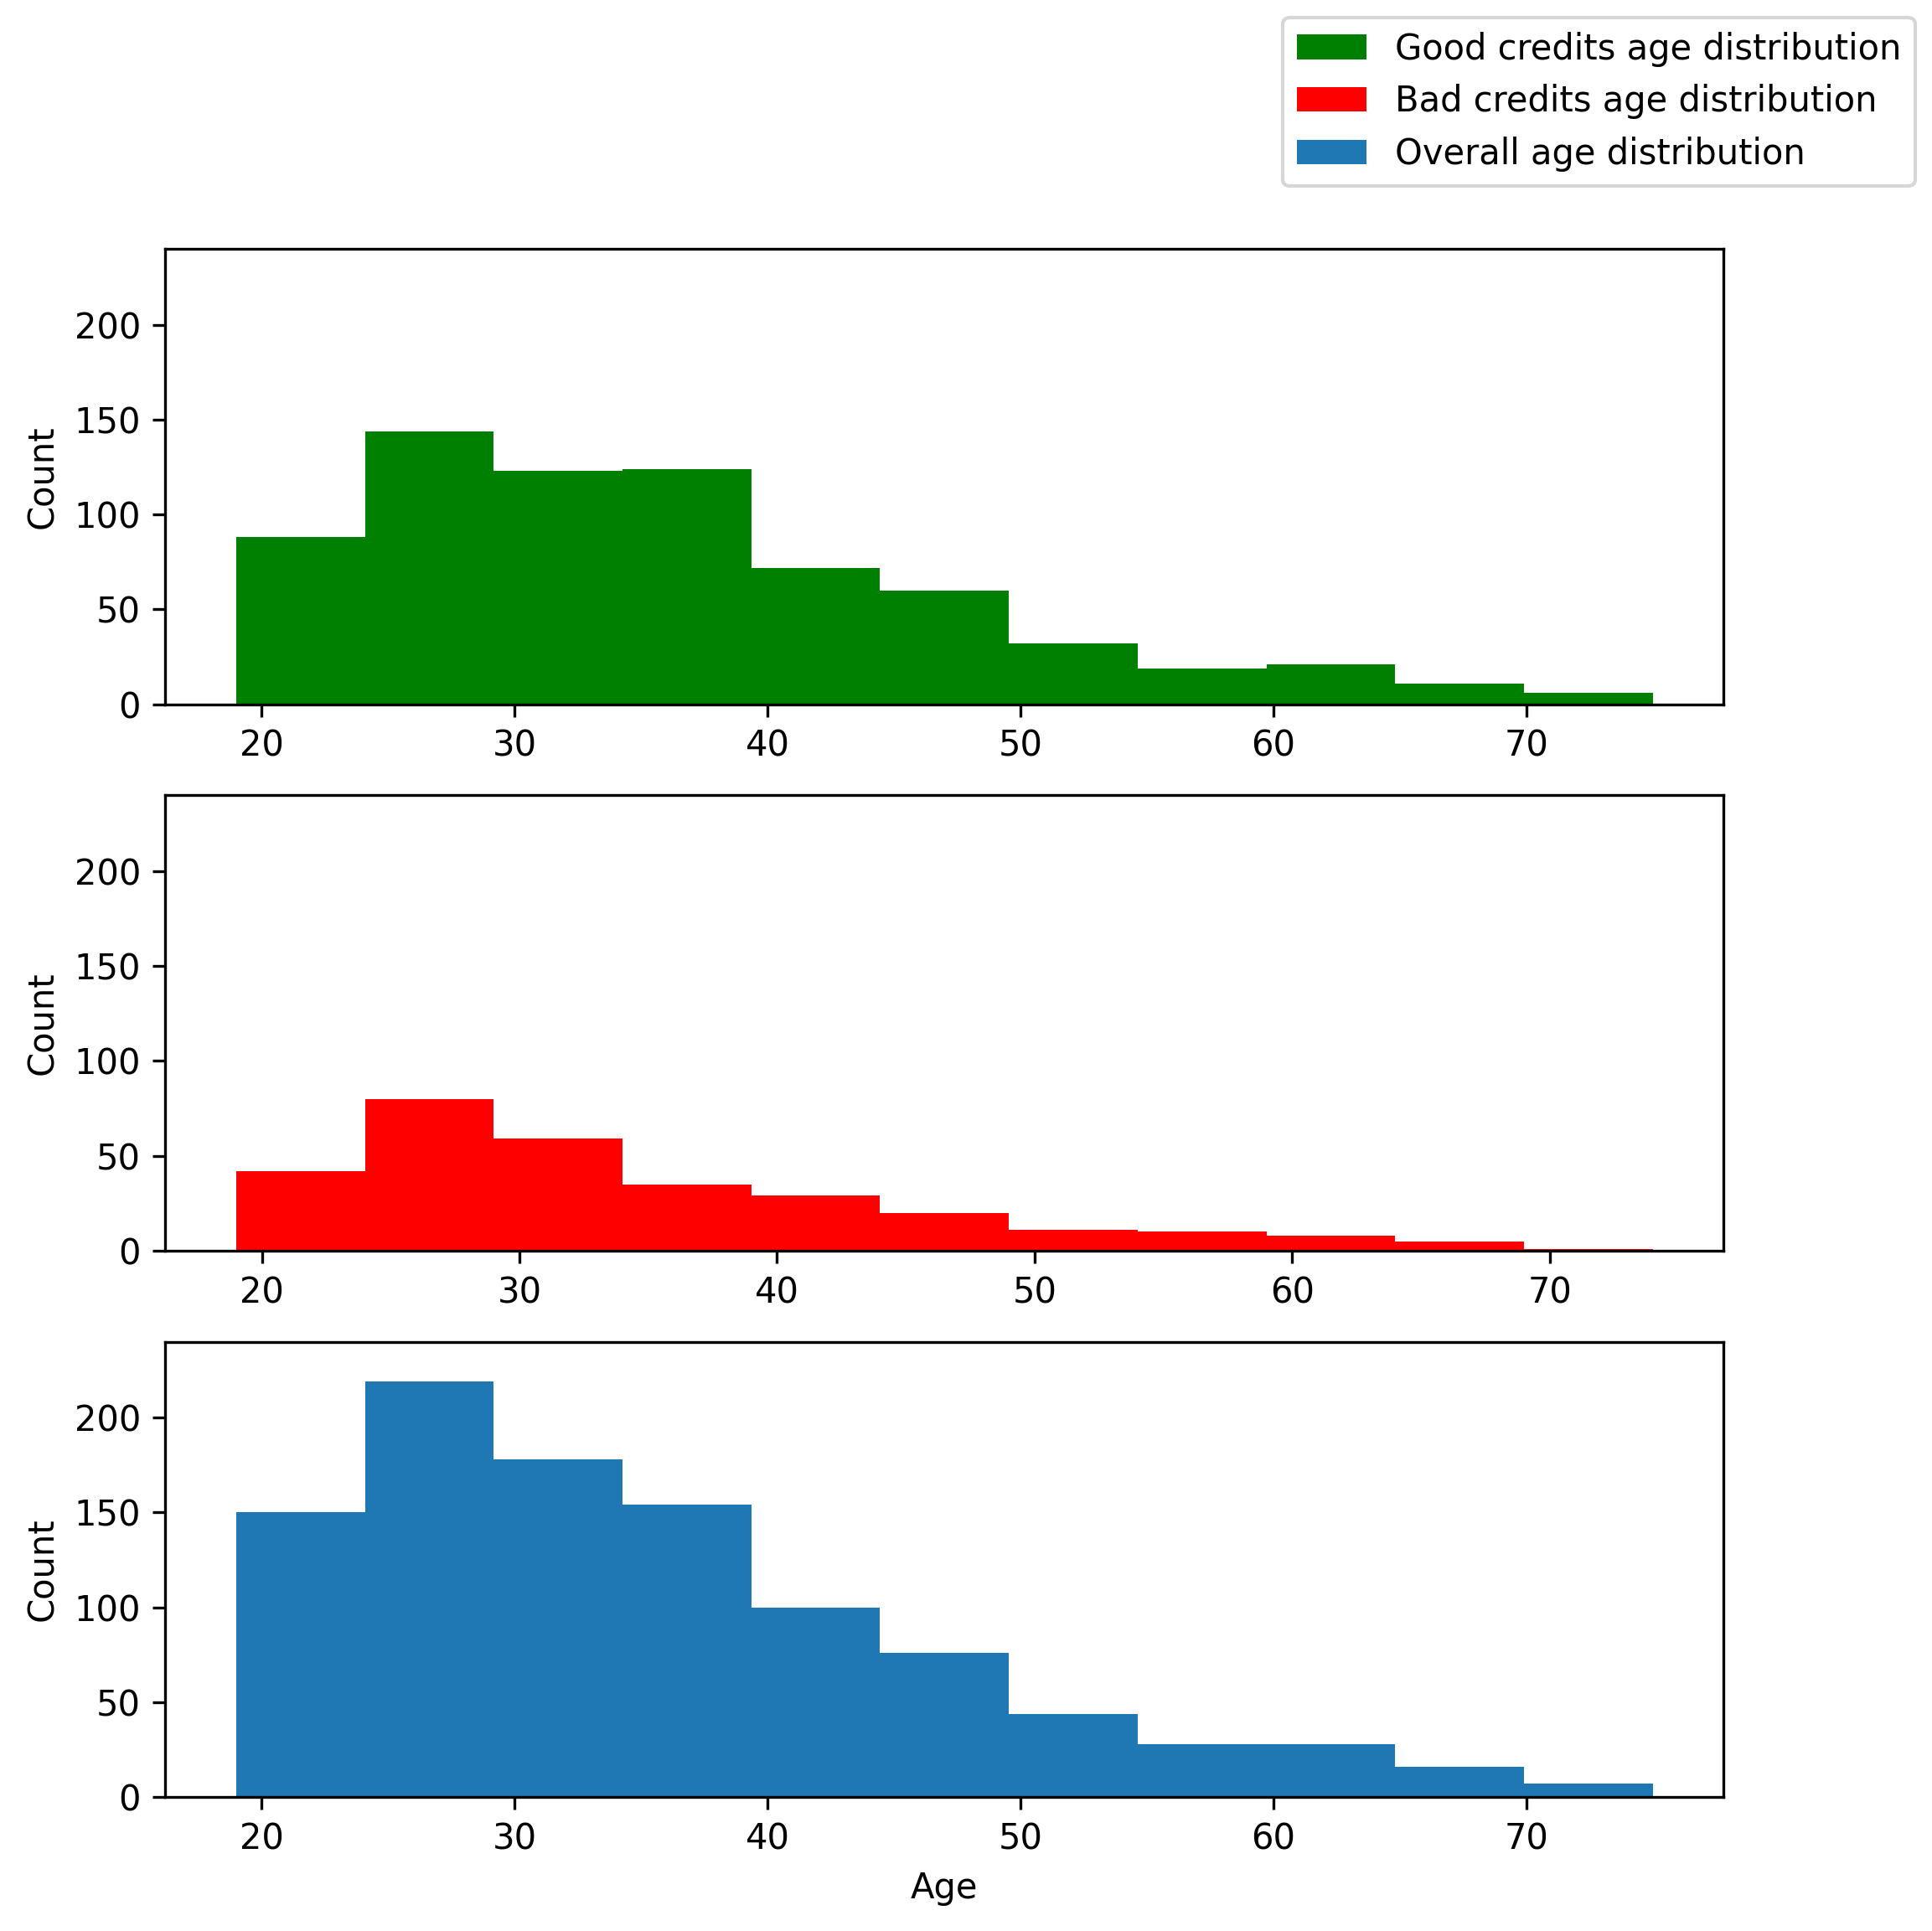

In [17]:
fig, axes = plt.subplots(3, 1, sharey=True, figsize=(8, 8), dpi=300)
axes[0].hist(data[data['credit_risk'] == 'good']["age"], color="g", bins=11)
axes[0].set_ylim(0, 240)
axes[0].set_ylabel("Count")
axes[1].hist(data[data['credit_risk'] == 'bad']["age"], color="r", bins=11)
axes[1].set_ylabel("Count")
axes[2].hist(data["age"], bins=11)
fig.legend(['Good credits age distribution', 'Bad credits age distribution', 'Overall age distribution'])
axes[2].set_ylabel("Count")
axes[2].set_xlabel("Age")
plt.show()

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

Переделаем колонку `credit_risk` в `binary_credit_risk` с числовыми значениями вместо строк "good"/"bad"

In [18]:
data["binary_credit_risk"] = data["credit_risk"].map({"good": 1, "bad": 0})

Так как в matplotlib нет аналога palette(seaborn), то пришлось воспользоваться максимально близком по цветовой гамме спектром в параметере cmap = "RdYlGn"

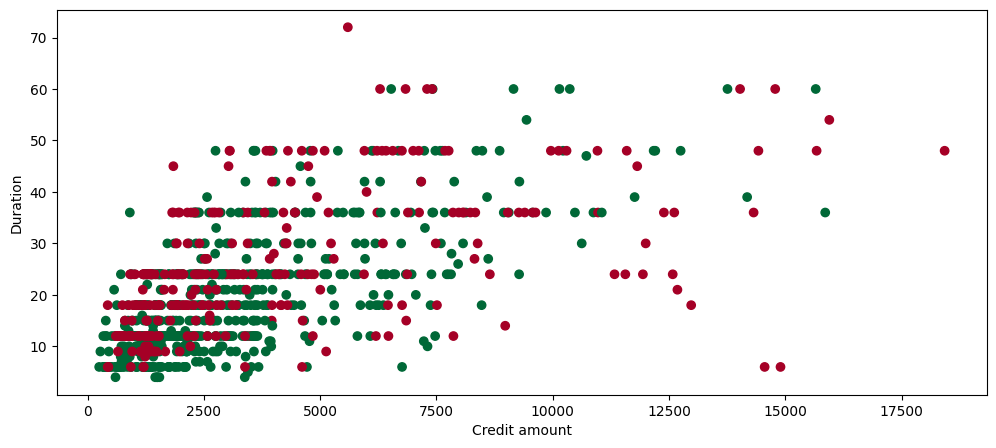

In [19]:
plt.figure(figsize=(12,5))
plt.scatter(data["amount"], data["duration"], c=data["binary_credit_risk"], cmap='RdYlGn')
plt.xlabel("Credit amount")
plt.ylabel("Duration")
plt.show()

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

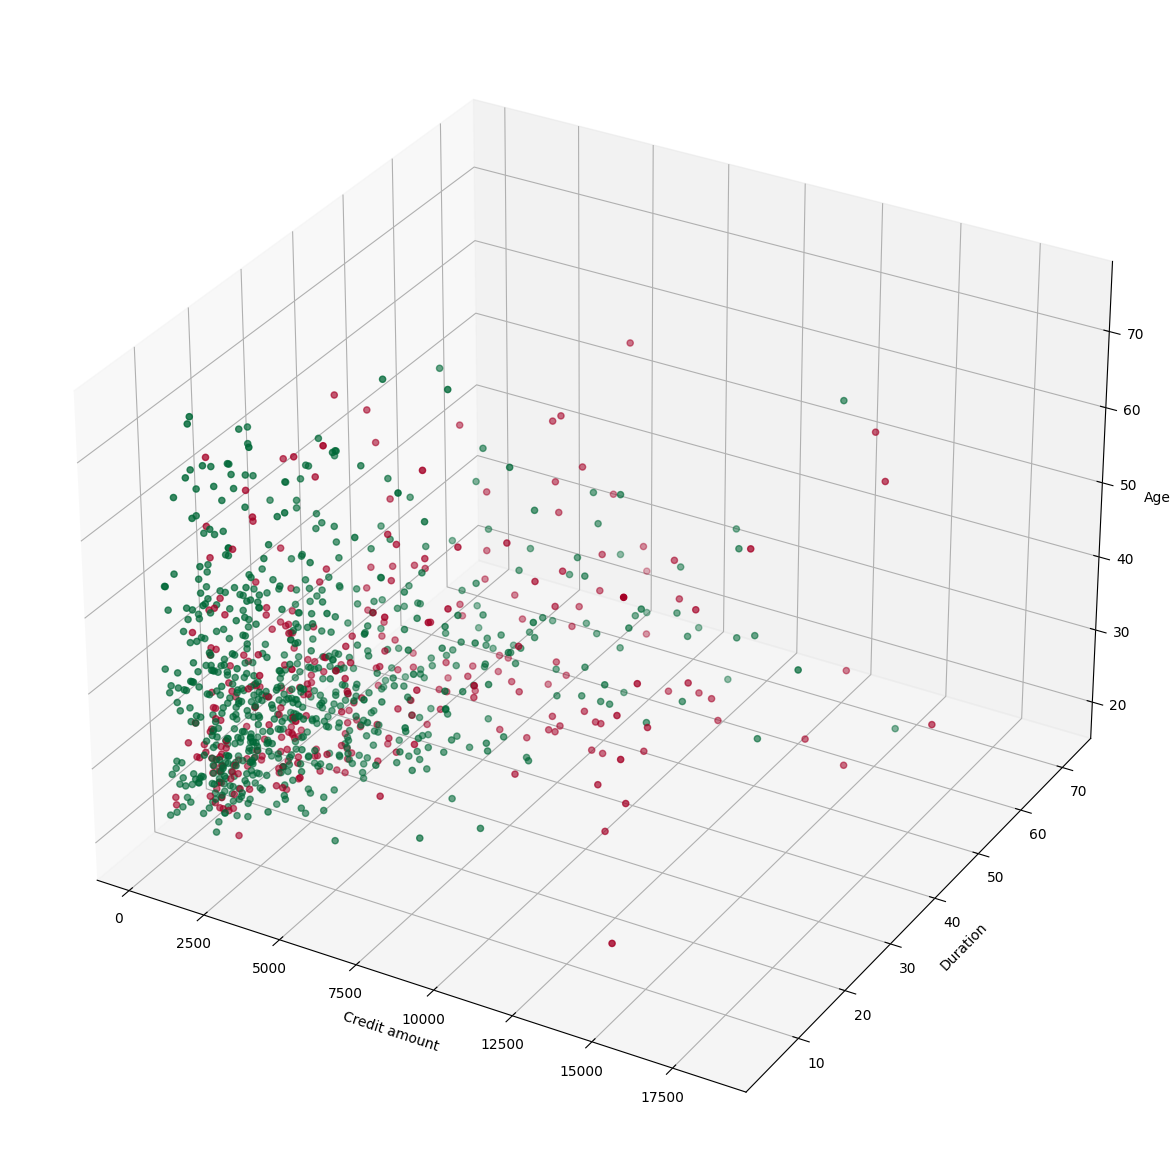

In [20]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(projection='3d')
ax.scatter(data["amount"], data["duration"], data["age"], c=data["binary_credit_risk"], cmap="RdYlGn")
ax.set_xlabel("Credit amount")
ax.set_ylabel('Duration')
ax.set_zlabel('Age')
plt.show()

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

Представление бинарных в числовые:

In [21]:
X_bin = pd.DataFrame() #dataframe с преобразованными бинарными признаками в числовые
X_bin["telephone"] = data["telephone"].map({"yes (under customer name)": 1, "no": 0})
X_bin["foreign_worker"] = data["foreign_worker"].map({"yes": 1, "no": 0})
X_bin["credit_risk"] = data["credit_risk"].map({"good": 1, "bad": 0})
X_bin["people_liable"] = data["people_liable"].map({"0 to 2": 1, "3 or more": 0})

Представление порядковых в числовые:

In [22]:
X_ord = pd.DataFrame() #dataframe с преобразованными порядковыми признаками в числовые
X_ord["status"] = data["status"].map({"no checking account": 0, "... < 0 DM": 1, "0<= ... < 200 DM": 2,
                                    "... >= 200 DM / salary for at least 1 year": 3})

X_ord["savings"] = data["savings"].map({"unknown/no savings account": 0, "... <  100 DM": 1, "100 <= ... <  500 DM": 2,
                                    "500 <= ... < 1000 DM": 3, "... >= 1000 DM": 4})

X_ord["employment_duration"] = data["employment_duration"].map({"unemployed": 0, "< 1 yr": 1, "1 <= ... < 4 yrs": 2,
                                      "4 <= ... < 7 yrs": 3, ">= 7 yrs": 4})

X_ord["installment_rate"] = data["installment_rate"].map({"< 20": 0, "20 <= ... < 25": 1, "25 <= ... < 35": 2,
                                                              ">= 35": 3})

X_ord["present_residence"] = data["present_residence"].map({"< 1 yr": 0, "1 <= ... < 4 yrs": 1, "4 <= ... < 7 yrs": 2,
                                                          ">= 7 yrs": 3})

Представление категориальных в числовые с помощью one-hot encoding

In [23]:
X_dum = pd.get_dummies(data[["credit_history", "purpose", "personal_status_sex", "other_debtors", "property", "other_installment_plans",
                           "housing", "job"]], sparse=True) #dataframe с преобразованными категориальными признаками в числовые

Объединим наши преобразованные признаки и числовые их первичного датафрейма в один - X_new

In [24]:
X_new = pd.concat([data[["duration", "amount", "age", "min_number_credits"]], X_bin, X_ord, X_dum], axis=1)

### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [25]:
def predict(Xtest: np.array) -> np.array:
    target = []
    for obj in Xtest:
        if sum(obj) > 0:
            target.append(1)
        else:
            target.append(0)
    return np.array(target, dtype=int)

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = X_new.drop('credit_risk', 1).values
y = X_new['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

accuracy_score(y_test, predict(X_test))

C:\Users\Ksenia\AppData\Local\Temp\ipykernel_20540\3369602768.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X_new.drop('credit_risk', 1).values


0.66